# Visualizing the History of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards   
are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition   
to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of   
Alfred Nobel (1833 - 1896), who established the prize.

<img src="nobel_prize.png" alt="Nobel Prize gold medal">

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from   
1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv`   
file in the `data` folder.

In [40]:
# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Change the default console output settings in NumPy and pandas to improve readability
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [41]:
# Load the dataset
nobel = pd.read_csv("data/nobel.csv")

# Preview the dataset
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discove...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of l...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheri...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany


**Analyze the `nobel.csv` dataset to answer the following questions:**

* What is the most commonly awarded gender and birth country?

* Which decade had the highest ratio of US-born Nobel Prize winners  
to total winners in all categories?

* Which decade and Nobel Prize category combination had the highest  
proportion of female laureates?

* Who was the first woman to receive a Nobel Prize, and in what category?

* Which individuals or organizations have won more than one Nobel Prize  
throughout the years?

**1. Find the most common gender and birth country**

In [42]:
# Find the most common gender
top_gender = nobel["sex"].value_counts().index[0]

print(f"The most commonly awarded gender: {top_gender}")

# Find the most common birth country
top_country = nobel["birth_country"].value_counts().index[0]

print(f"\nThe most commonly awarded country: {top_country}")

The most commonly awarded gender: Male

The most commonly awarded country: United States of America


**2. Identify the decade with the highest ratio of US-born winners**

In [43]:
# Create a 'usa_born_winner' column that will contain only boolean values
nobel["usa_born_winner"] = nobel["birth_country"] == "United States of America"

# Create a 'decade' column
nobel["decade"] = (np.floor(nobel["year"]/10) * 10).astype(int)

# Preview the DataFrame
nobel.head(3)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services he has rendered by the discove...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composition, which gives evidence of l...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its application against diphtheri...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900


In [44]:
# Find the ratio of US-born winners
usa_born_ratio = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

usa_born_ratio.head()

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326


In [45]:
# Identify the decade with the highest ratio of US-born winners
max_decade_usa = usa_born_ratio[usa_born_ratio["usa_born_winner"] == \
    usa_born_ratio["usa_born_winner"].max()]

max_decade_usa

,decade,usa_born_winner
10,2000,0.422764


In [46]:
# Save the decade value
result = max_decade_usa["decade"].values[0]

print(f"The decade with the highest ratio of US-born winners: {result}")

The decade with the highest ratio of US-born winners: 2000


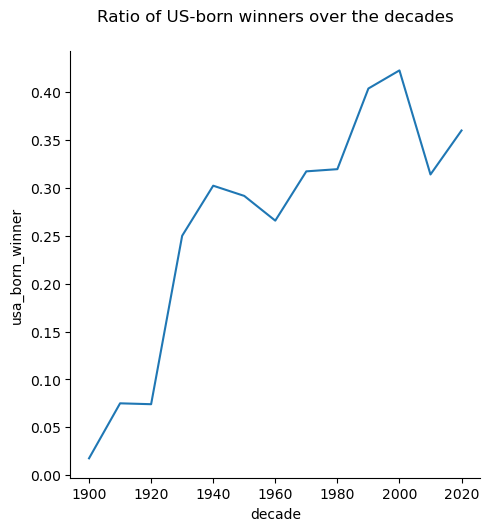

In [47]:
# Create a relational line plot
sns.relplot(x="decade", y="usa_born_winner", data=usa_born_ratio, kind="line")
plt.title("Ratio of US-born winners over the decades", y=1.05)
plt.show()

**3. Find the decade and category with the highest proportion of female laureates**

In [48]:
# Create a column for female Nobel laureates
nobel["female_winner"] = nobel["sex"] == "Female"

# Proportion of female Nobel laureates by decade and category
prop_female_winners = nobel.groupby(["decade", "category"], as_index=False)["female_winner"].mean()

prop_female_winners.head()

,decade,category,female_winner
0,1900,Chemistry,0.000000
1,1900,Literature,0.100000
2,1900,Medicine,0.000000
3,1900,Peace,0.071429
4,1900,Physics,0.076923


In [49]:
# Decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners["female_winner"] == \
    prop_female_winners["female_winner"].max()]

# Save only the 'decade' and 'category' values
max_female_decade_category[["decade", "category"]]

,decade,category
68,2020,Literature


In [50]:
# Store the result as a dictionary
max_female_dict = {
    max_female_decade_category["decade"].values[0]:
    max_female_decade_category["category"].values[0]
}

max_female_dict

{2020: 'Literature'}

In [51]:
print(f"The decade and category with the highest proportion of female laureates: {max_female_dict}")

The decade and category with the highest proportion of female laureates: {2020: 'Literature'}


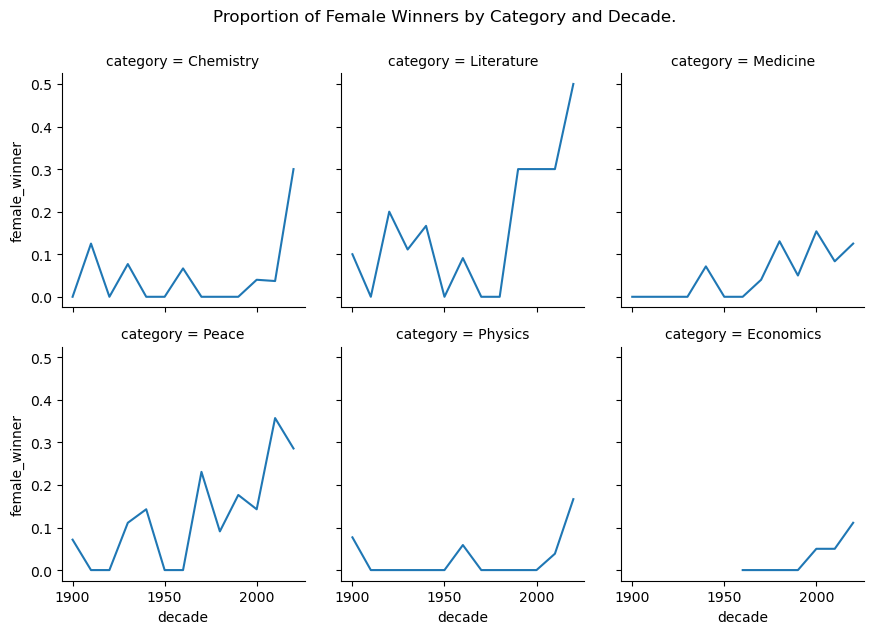

In [52]:
'''Create a facet grid to visualize the proportion of female laureates over  
the decades and across categories'''
g = sns.FacetGrid(prop_female_winners, col="category", col_wrap=3, height=3)
g.map(sns.lineplot, "decade", "female_winner")
g.fig.tight_layout()
plt.suptitle("Proportion of Female Winners by Category and Decade.", y=1.05)
plt.show()

**4. Find the first woman to win a Nobel Prize and category won**

In [53]:
# Filter DataFrame for female winners
nobel_women = nobel[nobel["female_winner"]]  # 'female_winner' column was created in an earlier step

# Find lowest value in 'year' column
min_row = nobel_women[nobel_women["year"] == nobel_women["year"].min()]

# Find name and prize category
first_woman_name = min_row["full_name"].values[0]

first_woman_category = min_row["category"].values[0]

print(f"The first woman to win the Nobel Prize was {first_woman_name} in the {first_woman_category} category")

The first woman to win the Nobel Prize was Marie Curie, née Sklodowska in the Physics category


**5. Determine repeat winners**

In [54]:
# Get the counts for each winner
counts = nobel["full_name"].value_counts()

print(counts.head())

full_name
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
Name: count, dtype: int64


In [55]:
# Keep only the names of repeat winners
repeats = counts[counts >= 2].index

# Save the names to a list
repeat_list = list(repeats)

print("Individuals or organisations that have won more than one Nobel Prize:\n")

print('\n'.join(repeat_list))

Individuals or organisations that have won more than one Nobel Prize:

Comité international de la Croix Rouge (International Committee of the Red Cross)
Linus Carl Pauling
John Bardeen
Frederick Sanger
Marie Curie, née Sklodowska
Office of the United Nations High Commissioner for Refugees (UNHCR)


<div style="text-align: center; font-size: 18px; font-weight: bold; color:#007BFF;">
<span>[ End of notebook ]</span>
</div>